In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn.metrics as sm
from sklearn.metrics import classification_report

## 데이터 로드

In [2]:
(xTrain,yTrain),(xTest,yTest) = tf.keras.datasets.mnist.load_data()

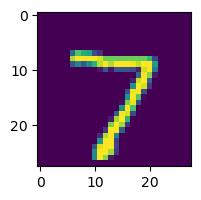

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(xTest[0])
plt.show()

## 데이터 전처리 1 (입력 데이터 변환)

In [4]:
# 정규화(표준화)
xTrain = xTrain/255.0
xTest = xTest/255.0

In [5]:
xTrain = xTrain.reshape((-1,28,28,1)) #(샘플수, 행수, 열수, 채널 수)
xTest = xTest.reshape((-1,28,28,1))

## 데이터 전처리 2 (출력 데이터 변환 : one-hot 인코딩)

In [6]:
yTrain = tf.keras.utils.to_categorical(yTrain,10)
yTest = tf.keras.utils.to_categorical(yTest,10)

In [7]:
yTest[0] # 7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## 모형 설계

Conv2D 레이어의 kernel_size와 filters, 그리고 MaxPool2D 레이어의 pool_size는 딥러닝 모델의 구조와 크기를 조절하는 하이퍼파라미터입니다. 이들 하이퍼파라미터의 값은 모델의 성능과 크기에 영향을 미칩니다.[chatGPT]

- 일반적으로, kernel_size를 크게하면 더 넓은 영역을 커버하게 되어 모델의 성능이 향상될 수 있습니다. 그러나 커널의 크기가 너무 커지면 모델이 과도하게 복잡해져 학습 시간이 길어지거나, 모델의 크기가 커져 메모리 문제가 발생할 수 있습니다. 보통 kernel_size는 3x3 또는 5x5 정도로 설정하는 경우가 많습니다.

- filters는 모델이 학습하는 특징 맵(feature map)의 개수입니다. 이 값이 클수록 모델이 더 복잡한 특징을 학습할 수 있습니다. 그러나 filters가 많을수록 모델의 크기가 커져 메모리 문제가 발생할 수 있습니다. 또한, filters의 개수가 너무 작으면 모델이 감지할 수 있는 패턴의 다양성이 부족해져 모델의 성능이 저하될 수 있습니다.

- pool_size는 MaxPool2D 레이어에서 사용되는 필터의 크기입니다. Max pooling은 입력 이미지를 작게 축소시켜 불필요한 정보를 제거하고, 이미지의 중요한 특징만을 남기는 역할을 합니다. pool_size를 크게하면 모델의 크기가 줄어들어 계산량을 줄일 수 있지만, 이미지의 세부 정보가 손실될 수 있습니다. 일반적으로 pool_size는 2x2 또는 3x3으로 설정하는 경우가 많습니다.

- padding 키워드 인자 : 'same'인 경우, convolution을 할 때 차원을 유지하기 위해 0을 추가한다(zero padding). 'valid'인 경우, 필터를 그대로 적용하여 kernel_size에 따라 차원이 줄어든다. 

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1),
                                kernel_size=[3,3],
                                filters=32,
                                activation='relu'))

In [10]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [11]:
model.add(tf.keras.layers.Conv2D(kernel_size=[3,3],
                                filters=64,
                                activation='relu'))

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [13]:
model.add(tf.keras.layers.Conv2D(kernel_size=[3,3],
                                filters=64,
                                activation='relu'))

In [14]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [16]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

## 모형 컴파일

In [17]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 모형 학습

In [18]:
BATCH_SIZE = 64
VALIDATION_SPLIT=0.2

In [19]:
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir="D:/SKH/DevStudy/JupyterNotebook/kmu_itconsulting/log/images_CNN/")

In [20]:
history = model.fit(x=xTrain,y=yTrain,
                   batch_size=BATCH_SIZE,
                   epochs=20,
                   validation_split=VALIDATION_SPLIT,
                   callbacks=[tensorboard,
                     tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/20
750/750 [==============================] - 14s 17ms/step - loss: 0.2028 - accuracy: 0.9351 - val_loss: 0.0675 - val_accuracy: 0.9814
Epoch 2/20
750/750 [==============================] - 14s 19ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0735 - val_accuracy: 0.9764
Epoch 3/20
750/750 [==============================] - 15s 21ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0440 - val_accuracy: 0.9872
Epoch 4/20
750/750 [==============================] - 16s 21ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 5/20
750/750 [==============================] - 16s 21ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0451 - val_accuracy: 0.9881
Epoch 6/20
750/750 [==============================] - 14s 19ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0347 - val_accuracy: 0.9909
Epoch 7/20
750/750 [==============================] - 14s 18ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0484 - val_accuracy:

## 모형 테스트

In [21]:
test_loss, test_accuracy = model.evaluate(x=xTest,y=yTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9915


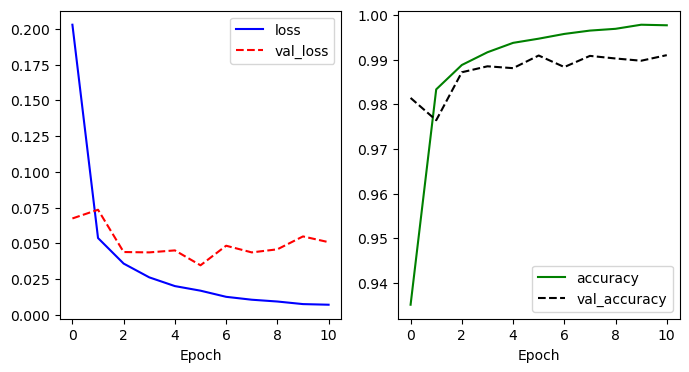

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Confusion Matrix를 활용해 실제값, 예측값 비교

In [23]:
yPredicted = model.predict(x=xTest)

313/313 [==============================] - 1s 3ms/step


In [25]:
yPredicted.round()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
yTest_decoded = np.argmax(yTest,axis=1)
yPredicted_decoded = np.argmax(yPredicted,axis=1)

In [27]:
cm = sm.confusion_matrix(yPredicted_decoded,yTest_decoded)
print(cm)

[[ 978    0    1    0    0    1    3    0    4    1]
 [   0 1131    0    0    0    0    3    4    0    0]
 [   0    1 1027    2    0    0    1    5    2    0]
 [   0    1    0 1003    0    4    0    0    0    1]
 [   0    0    0    0  973    0    2    0    0    3]
 [   0    1    0    4    0  883    1    0    1    3]
 [   0    1    1    0    2    1  948    0    0    0]
 [   1    0    3    0    0    1    0 1016    1    4]
 [   1    0    0    1    2    1    0    2  964    5]
 [   0    0    0    0    5    1    0    1    2  992]]


In [30]:
report = classification_report(yTest_decoded,yPredicted_decoded)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Max_pooling 2D 

In [31]:
x = tf.constant([[-7,2,2,-2,5],
                [-11,-1,3,3,8],
                [-10,0,-1,5,11],
                [-14,4,3,1,11],
                [-10,7,2,-4,8]])

In [32]:
x

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ -7,   2,   2,  -2,   5],
       [-11,  -1,   3,   3,   8],
       [-10,   0,  -1,   5,  11],
       [-14,   4,   3,   1,  11],
       [-10,   7,   2,  -4,   8]])>

In [33]:
x = tf.reshape(x,[1,5,5,1])

In [35]:
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same')

In [38]:
max_pool_2d(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[ 2],
         [ 3],
         [ 8]],

        [[ 4],
         [ 5],
         [11]],

        [[ 7],
         [ 2],
         [ 8]]]])>

# Convolution

In [85]:
x = tf.constant([[2.0,3.0,1.0,0.0,5.0],
                [3.0,4.0,2.0,5.0,0.0],
                [3.0,4.0,6.0,3.0,1.0],
                [7.0,2.0,5.0,3.0,7.0],
                [9.0,8.0,4.0,5.0,6.0]])

In [86]:
x = tf.reshape(x,[1,5,5,1])

In [87]:
convolution = tf.keras.layers.Conv2D(filters=1,
                                    kernel_size=(3, 3), 
                                    padding='same', 
                                    strides=1
                                    )

In [88]:
result = convolution(x)

In [89]:
np.round(result)

array([[[[-2.],
         [-0.],
         [ 1.],
         [-2.],
         [ 3.]],

        [[-1.],
         [ 1.],
         [ 0.],
         [ 3.],
         [ 2.]],

        [[-2.],
         [ 4.],
         [ 2.],
         [ 3.],
         [ 1.]],

        [[-3.],
         [ 2.],
         [ 5.],
         [ 2.],
         [ 2.]],

        [[ 2.],
         [ 7.],
         [ 3.],
         [ 5.],
         [ 4.]]]], dtype=float32)